# Assignment 1


### Steven H. Yang, Minerva University

#### January 22nd, 2022

## 1. Moore's Law
Use the scripts from here to download a large amount of data relating to CPU specs. The scripts might take as long as an hour, depending on your connection speed. (Pay attention to the line "If you want to skip the steps in this section, you can simply download the aggregated result files from http://preshing.com/files/specdata20120207.zip and extract them to this folder." This will be faster and save you some troubles while providing the same dataset.)

In [110]:
import pandas as pd


# Read Data
df = pd.read_csv ('data/benchmarks.csv')
df2 = pd.read_csv ('data/summaries.csv')

# Check if the data is loaded correctly
# print (df)
# print(df2)
df2

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3444: DtypeWarning: Columns (3) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


,testID,tester,machine,cpu,mhz,hwAvail,os,compiler,autoParallel,benchType,base,peak
0,cpu95-19990104-03254,Dell,Precision WorkStation 610 (450MHz),450 MHz Pentium II XEON,450.0,Jan-1999,Microsoft Windows NT 4.0 sp3,Intel Fortran Compiler 2.4,No,CFP95,13.9,15.2
1,cpu95-19990104-03256,Dell,Precision WorkStation 610 (450MHz),450 MHz Pentium II XEON,450.0,Jan-1999,Microsoft Windows NT 4.0 sp3,"Intel C Compiler 2.4 for Windows NT, Microsoft...",No,CINT95,19.0,19.0
2,cpu95-19990118-03257,"Siemens, Germany",CELSIUS 2000,Pentium II Xeon Processor 450 MHz,450.0,Nov-1998,Windows NT V4.0 (Service Pack 3),Intel C Compiler Plug-In 2.4,No,CINT95,18.9,18.9
3,cpu95-19990118-03258,"Siemens, Germany",CELSIUS 2000,Pentium II Xeon Processor 450 MHz,450.0,Nov-1998,Windows NT V4.0 (Service Pack 4),Intel Fortran Compiler Plug-In 2.4,No,CFP95,13.5,15.0
4,cpu95-19990122-03268,"Sun, Palo Alto",Sun Enterprise 3500,400MHz UltraSPARC II,400.0,Dec-1998,Solaris 2.7,Sun C 5.0,No,CINT95,14.3,17.7
...,...,...,...,...,...,...,...,...,...,...,...,...
10150,cpu2006-20120102-19311,Intel Corporation,Intel DH61WW motherboard (Intel Core i3-2130),Intel Core i3-2130,3400.0,Sep-2011,Microsoft Windows 7 Ultimate 6.1.7601 Service ...,C/C++: Version 12.1.0.229 of Intel C++ Studio ...,Yes,CINT2006,39.6,41.2
10151,cpu2006-20120102-19313,Intel Corporation,Intel DH61WW motherboard (Intel Pentium G840),Intel Pentium G840,2800.0,May-2011,Microsoft Windows 7 Ultimate 6.1.7601 Service ...,C/C++: Version 12.1.0.229 of Intel C++ Studio ...,Yes,CFP2006,39.9,40.7
10152,cpu2006-20120102-19315,Intel Corporation,Intel DH61WW motherboard (Intel Pentium G840),Intel Pentium G840,2800.0,May-2011,Microsoft Windows 7 Ultimate 6.1.7601 Service ...,C/C++: Version 12.1.0.229 of Intel C++ Studio ...,Yes,CINT2006,33.5,35.0
10153,cpu2006-20120102-19317,Intel Corporation,Intel DH61WW motherboard (Intel Pentium G840),Intel Pentium G840,2800.0,May-2011,Microsoft Windows 7 Ultimate 6.1.7601 Service ...,C/C++: Version 12.1.0.229 of Intel C++ Studio ...,Yes,CFP2006,35.1,35.9


1-1. Extract the date and base speed for a benchmark of your choice.

In [111]:
# Choosing the benchmark of my choice.
# Here I choose 101.tomcatv
df = df[df['benchName']=='101.tomcatv']

# Merge df and df2 with relevant hwAwail dates.
df_final = pd.merge(df, df2[['testID', 'hwAvail']], on = ['testID'])

# Drop all null data.
df_final.dropna(axis=0, how='all', subset = ['base'], inplace=True)
df_final

,testID,benchName,base,peak,hwAvail
0,cpu95-19990104-03254,101.tomcatv,19.40,27.1,Jan-1999
1,cpu95-19990118-03258,101.tomcatv,19.50,27.5,Nov-1998
2,cpu95-19990122-03281,101.tomcatv,35.30,37.1,Dec-1998
3,cpu95-19990122-03282,101.tomcatv,43.00,49.8,Dec-1998
4,cpu95-19990122-03283,101.tomcatv,63.90,75.0,Dec-1998
...,...,...,...,...,...
570,p074,101.tomcatv,3.40,4.66,Jun-1995
571,p075,101.tomcatv,7.34,8.89,Nov-1995
572,p076,101.tomcatv,8.46,9.86,Mar-1996
573,p077,101.tomcatv,9.45,11.0,Mar-1996


In [112]:
# Dates are currently in string data type.
# Convert them into numbers so it can be plotted.

import math
def date_to_int(x):
    '''
    This function converts the date data which are in string already to integer.

    Input
    ------
    x, str: hwAvail data from df_final.

    Output
    ------
    converted, int: converted date in integer format.
    '''

    # Make sure the given data is string
    x = str(x)
    # Split the data into month and year.
    x = x.split(" ")[0].split("-")
    # Assign month numbers to the months written in English.
    months = {'Jan': 1, 'Feb': 2, 'Mar': 3, 'Apr': 4, 'May': 5, 'Jun': 6, 'Jul': 7, 'Aug': 8, 'Sep': 9, 'Oct': 10, 'Nov': 11, 'Dec': 12}
    converted = int(months[x[0]])/12+int(x[1])
    return converted

# Apply date_to_int function to the dataframe.
df_final["hwAvail"] = df_final["hwAvail"].apply(date_to_int)

# Convert bases in log format for semi-log plot.
df_final["base"] = df_final["base"].apply(lambda x: math.log2(x))
df_final

,testID,benchName,base,peak,hwAvail
0,cpu95-19990104-03254,101.tomcatv,4.277985,27.1,1999.083333
1,cpu95-19990118-03258,101.tomcatv,4.285402,27.5,1998.916667
2,cpu95-19990122-03281,101.tomcatv,5.141596,37.1,1999.000000
3,cpu95-19990122-03282,101.tomcatv,5.426265,49.8,1999.000000
4,cpu95-19990122-03283,101.tomcatv,5.997744,75.0,1999.000000
...,...,...,...,...,...
570,p074,101.tomcatv,1.765535,4.66,1995.500000
571,p075,101.tomcatv,2.875780,8.89,1995.916667
572,p076,101.tomcatv,3.080658,9.86,1996.250000
573,p077,101.tomcatv,3.240314,11.0,1996.250000


1-2. Plot the data in a semi-log plot.

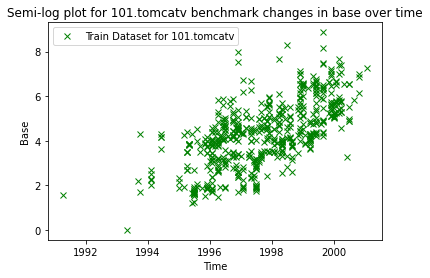

In [113]:
import matplotlib.pyplot as plt
plt.plot(df_final["hwAvail"], df_final['base'], 'x', color='green', label = "Train Dataset for 101.tomcatv")

# Title for the plot
plt.title('Semi-log plot for 101.tomcatv benchmark changes in base over time')

# X label
plt.xlabel('Time')

# Y label
plt.ylabel('Base')

# Show the legend
plt.legend()
plt.show()

1-3. Now train a linear model to fit your plot.

2


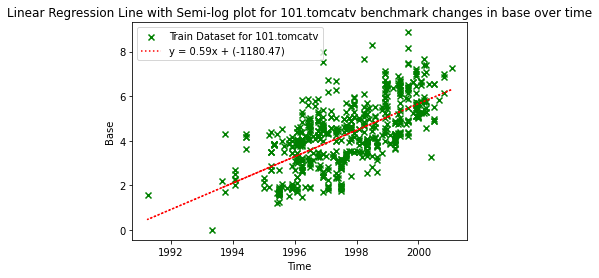

R2 score of the model: 0.4218725529134727


In [114]:
# This code cell is written after looking at the documentation:
# https://scikit-learn.org/stable/auto_examples/linear_model/plot_ols.html

from sklearn.linear_model import LinearRegression
import numpy
from numpy import array
# Checking the dimension of the current df_final
print(df_final.ndim)

# Reshape the data to change the dimension of the df_final
# Referenece: https://towardsdatascience.com/get-into-shape-14637fe1cd32
X = df_final["hwAvail"].values.reshape(-1, 1)
y = df_final["base"].values.reshape(-1, 1)

linear_model = LinearRegression()
linear_model.fit(X, y)

plt.scatter(X, y, marker = 'x', color='green', label = "Train Dataset for 101.tomcatv")


# Getting coefficient and y_intercept for the linearn regression line.
# Round up to two digits.
coef = round(float(linear_model.coef_[0]),2)
y_intercept = round(float(linear_model.intercept_),2)

# Plot the Linear Regerssion Line
plt.plot(X, linear_model.predict(X),color='red', label = f"y = {coef}x + ({y_intercept})",  linewidth = 1.5, linestyle=':')
plt.legend()

# Title
plt.title('Linear Regression Line with Semi-log plot for 101.tomcatv benchmark changes in base over time')

# X label
plt.xlabel('Time')

# Y label
plt.ylabel('Base')

plt.show()

# This R2 score does NOT compare with the trained and test data due to the missing of test data.
# However, this still shows how scores how much good that this regression line is represented.
print('R2 score of the model:', linear_model.score(X,y))

1-4. How well is Moore's Law holding up?

Moore's law states that the number of transistors in IC (integrated circuit) doubles about every two years. This is based on the observation and basically tells us that how CPU industry can changes over the time.

As I found above relationship, there's a linear regression line found, which tells us there's a linear relationship. As I mentioned in the code cell as a comment, the R2 score that I have here does not compare with the test data with this current trained data due to the lack of test data; however, it tells us how good enough this linear regression line is representing the current data set. Based on the R2 score I got, I can tell there is a weak linear relationship observed in this case.

To improve this, one can consider splitting current data into train and test data; however, one should be aware of having too less train data. After that if one observes a regression line with good accuracy, that might be a better model than this.

## 2. MNIST Digits
No machine learning course would be complete without using the MNIST dataset. This dataset was a hugely influential dataset of handwriting digits (0-9).

2-1. Using scikit-learn, load the MNIST digits (see here).

In [115]:
from sklearn.datasets import load_digits
digits = load_digits()

# Check if the data is loaded successfully.
digits

{'data': array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ..., 10.,  0.,  0.],
        [ 0.,  0.,  0., ..., 16.,  9.,  0.],
        ...,
        [ 0.,  0.,  1., ...,  6.,  0.,  0.],
        [ 0.,  0.,  2., ..., 12.,  0.,  0.],
        [ 0.,  0., 10., ..., 12.,  1.,  0.]]),
 'target': array([0, 1, 2, ..., 8, 9, 8]),
 'frame': None,
 'feature_names': ['pixel_0_0',
  'pixel_0_1',
  'pixel_0_2',
  'pixel_0_3',
  'pixel_0_4',
  'pixel_0_5',
  'pixel_0_6',
  'pixel_0_7',
  'pixel_1_0',
  'pixel_1_1',
  'pixel_1_2',
  'pixel_1_3',
  'pixel_1_4',
  'pixel_1_5',
  'pixel_1_6',
  'pixel_1_7',
  'pixel_2_0',
  'pixel_2_1',
  'pixel_2_2',
  'pixel_2_3',
  'pixel_2_4',
  'pixel_2_5',
  'pixel_2_6',
  'pixel_2_7',
  'pixel_3_0',
  'pixel_3_1',
  'pixel_3_2',
  'pixel_3_3',
  'pixel_3_4',
  'pixel_3_5',
  'pixel_3_6',
  'pixel_3_7',
  'pixel_4_0',
  'pixel_4_1',
  'pixel_4_2',
  'pixel_4_3',
  'pixel_4_4',
  'pixel_4_5',
  'pixel_4_6',
  'pixel_4_7',
  'pixel_5_0',
  'pixel_5_1',
 

2-2. Plot some of the examples.

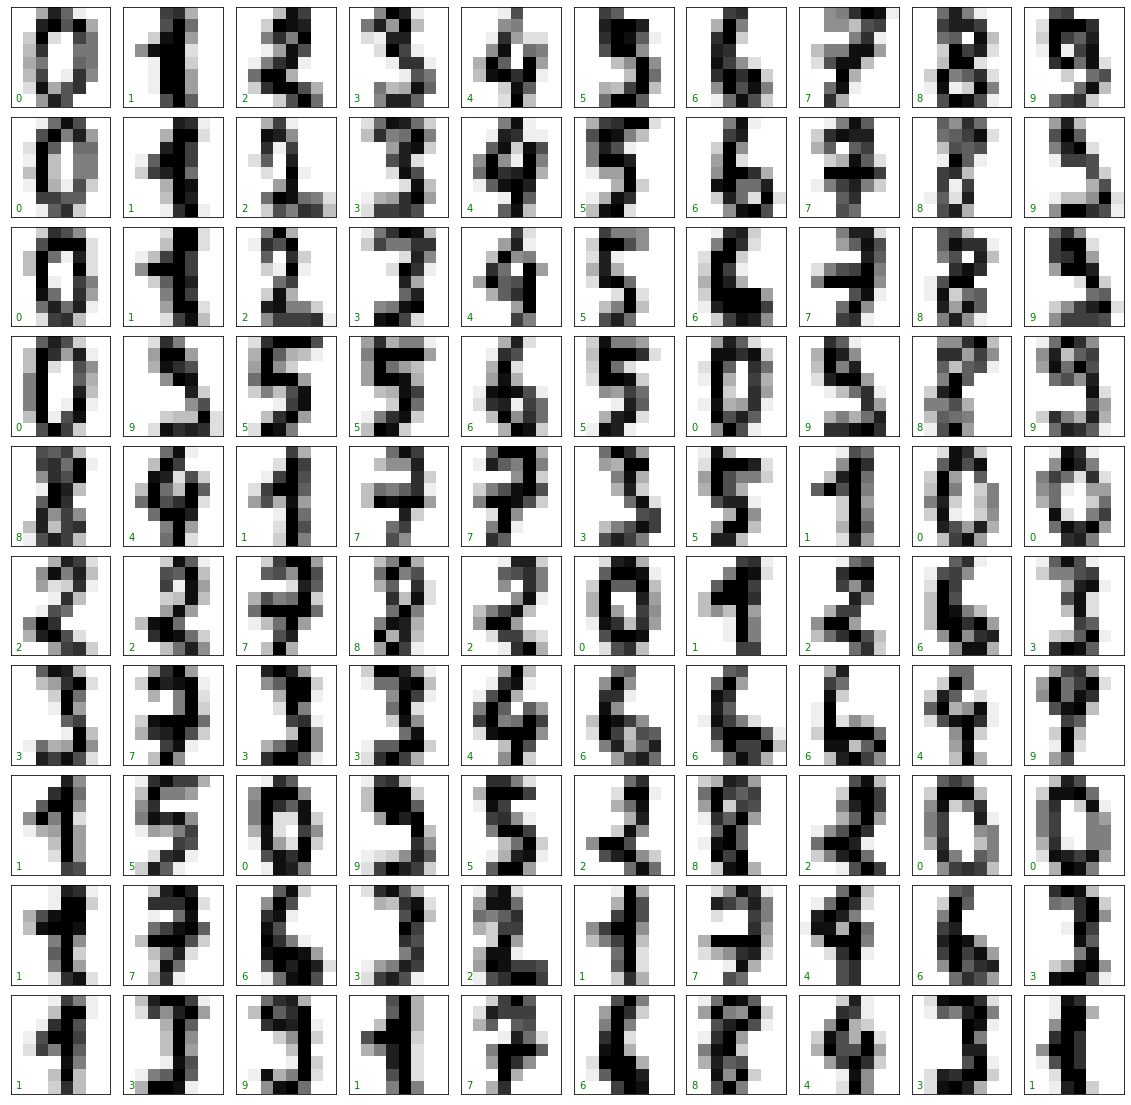

In [116]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(10, 10, figsize=(20, 20),
                         subplot_kw={'xticks':[], 'yticks':[]},
                         gridspec_kw=dict(hspace=0.1, wspace=0.1))
for i, ax in enumerate(axes.flat):
    ax.imshow(digits.images[i], cmap='binary', interpolation='nearest')
    ax.text(0.05, 0.05, str(digits.target[i]),
            transform=ax.transAxes, color='green')


2-3. Choose two digit classes (e.g. 7s and 3s), and train a k-nearest neighbor classifier.

(Note: Here, I wanted to see all digits, so I do this for every digit)

In [117]:
import numpy as np
import pandas as pd
import pprint
from sklearn.datasets import load_digits
from IPython.display import display, HTML
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split

# Initialize data and target
X = digits.data 
y = digits.target

# Split train and test data.
# I use 30% of data as train data.
trainData,testData,trainLabel,testLabel = train_test_split(X, y, test_size=0.30, random_state=123)

2-4. Report your error rates on a held out part of the data.

Here, I use 30% of data as train data. I wanted to have a model that makes a good prediction for the majority of data but with smallest sample possible. To avoid having too less sample, I avoid going lower than 25% but to avoid having too many ample, I avoid going over 50%. In between, I tried different values and choose the one gives the best accuracy.

In [118]:
# Define KNN's k. The number of neighbors.
model = KNeighborsClassifier(n_neighbors=3)
# I tried multiple values of k, and seems k=3 performs the best.

# Fit the model
model.fit(trainData,trainLabel)

predictions = model.predict(testData)
print(classification_report(testLabel,predictions))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        59
           1       0.92      1.00      0.96        56
           2       1.00      0.98      0.99        53
           3       0.94      1.00      0.97        46
           4       0.98      1.00      0.99        61
           5       1.00      0.96      0.98        57
           6       1.00      1.00      1.00        57
           7       1.00      1.00      1.00        50
           8       0.98      0.92      0.95        48
           9       0.96      0.91      0.93        53

    accuracy                           0.98       540
   macro avg       0.98      0.98      0.98       540
weighted avg       0.98      0.98      0.98       540



As it has 0.98 accuracy, the error rate here is 1=0.98 = 0.02, which is 2%.

2-5. (Optional) Test your model on the full dataset (available from http://yann.lecun.com/exdb/mnist/)

In [124]:
import gzip
import shutil
with gzip.open('train-labels-idx1-ubyte.gz', 'rb') as f_in:
    with open('train-labels-idx1-ubyte', 'wb') as f_out:
        shutil.copyfileobj(f_in, f_out)
with gzip.open('train-images-idx3-ubyte.gz', 'rb') as f_in:
    with open('train-images-idx3-ubyte', 'wb') as f_out:
        shutil.copyfileobj(f_in, f_out)
with gzip.open('t10k-labels-idx1-ubyte.gz', 'rb') as f_in:
    with open('t10k-labels-idx1-ubyte', 'wb') as f_out:
        shutil.copyfileobj(f_in, f_out)
with gzip.open('t10k-images-idx3-ubyte.gz', 'rb') as f_in:
    with open('t10k-images-idx3-ubyte', 'wb') as f_out:
        shutil.copyfileobj(f_in, f_out)

In [125]:
# Reference for this code can be found here: https://github.com/egcode/MNIST-to-CSV

def convert(imgf, labelf, outf, n):
    f = open(imgf, "rb")
    o = open(outf, "w")
    l = open(labelf, "rb")

    f.read(16)
    l.read(8)
    images = []

    for i in range(n):
        image = [ord(l.read(1))]
        for j in range(28*28):
            image.append(ord(f.read(1)))
        images.append(image)

    for image in images:
        o.write(",".join(str(pix) for pix in image)+"\n")
    f.close()
    o.close()
    l.close()
    print('Conversion Finished.')

convert("train-images-idx3-ubyte", "train-labels-idx1-ubyte",
"mnist_train.csv", 60000)
convert("t10k-images-idx3-ubyte", "t10k-labels-idx1-ubyte",
"mnist_test.csv", 10000)

Conversion Finished.
Conversion Finished.


In [126]:
# Import csv data sets.
df = pd.read_csv ('mnist_train.csv', header = None)
df2 = pd.read_csv('mnist_test.csv', header = None)
trainData2,trainLabel2 = df.loc[:, df.columns!= 0], df[0]

# Define KNN's k. The number of neighbors.
model2 = KNeighborsClassifier(n_neighbors=3)
# Keep use 3 as above for consistency.

# Fit the model.
model2.fit(trainData2,trainLabel2)


testLabel2 = df2[0]
predictions2 = model2.predict(df2.loc[:, df2.columns!= 0])
print(classification_report(testLabel,predictions))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        59
           1       0.92      1.00      0.96        56
           2       1.00      0.98      0.99        53
           3       0.94      1.00      0.97        46
           4       0.98      1.00      0.99        61
           5       1.00      0.96      0.98        57
           6       1.00      1.00      1.00        57
           7       1.00      1.00      1.00        50
           8       0.98      0.92      0.95        48
           9       0.96      0.91      0.93        53

    accuracy                           0.98       540
   macro avg       0.98      0.98      0.98       540
weighted avg       0.98      0.98      0.98       540

